# Morphological Transformations

Morphological operations are image processing techniques that involve the use of a structuring element to analyze the relationship between shapes in an image. The two fundamental morphological operations are erosion and dilation, which can be used for various purposes including:

1. Noise reduction: Erosion can help in reducing noise or small artifacts in an image by shrinking the boundaries of regions and smoothing out irregularities. It removes isolated pixels or small clusters that do not match the shape of the structuring element.

2. Isolation of individual elements and joining disparate elements: Dilation expands the boundaries of regions in an image, which can be useful for joining broken or disconnected parts of an object. It can help in closing small gaps between objects or filling in missing regions.

3. Detection of intensity bumps or holes: By performing erosion and dilation operations in combination, morphological operations can be used to detect and analyze the presence of intensity bumps or holes in an image. Erosion followed by dilation (closing operation) can fill in small holes or gaps, while dilation followed by erosion (opening operation) can separate or isolate individual intensity bumps.

These morphological operations play a significant role in various image processing tasks, including image enhancement, segmentation, feature extraction, and object recognition. They provide a powerful set of tools for modifying and analyzing the structure of images based on the shapes and relationships within them.

## Dilation

Dilation is a fundamental operation in morphological image processing, involving the application of a kernel or structuring element to an image. This kernel, represented as a small matrix, has a designated anchor point, typically located at its center {cite:p}`opencv_library, OpenCVDocumentation`.

During dilation, the kernel's center is placed on each pixel of the input image, and the kernel's values are compared to the corresponding pixels in the local neighborhood around the anchor point. The output pixel value is determined by selecting the maximum value among the kernel elements that overlap with this neighborhood.

The result of dilation is the expansion or "growth" of regions within the image, as the maximum pixel value within the neighborhood becomes the new value for the central pixel. This process enhances or enlarges bright areas or regions in the image. Dilation is often used alongside other morphological operations like erosion to achieve specific image processing effects, enabling manipulation of object shapes and sizes within the image.

Dilation serves a crucial role in various applications, including image enhancement, edge detection, feature extraction, and object recognition. It is particularly useful for tasks such as filling small gaps, connecting fragmented parts, and thickening or enlarging object boundaries within an image.

In the context of OpenCV, image dilation can be performed using the [dilate](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.erode#dilate) function. This function dilates the source image using a specified structuring element, defining the shape of the pixel neighborhood. The maximum value is determined based on the following equation:

\begin{equation}
\texttt{dst} (x, y) = \max _{(x', y'): \, \texttt{element} (x', y') \ne0 } \texttt{src} (x + x', y + y')
\end{equation}

The `cv2.dilate` function in Python is part of the OpenCV library and is used for image dilation, which is a morphological operation that enlarges the white regions (foreground) in a binary image. Here's a refined explanation of the function signature {cite:p}`opencv_library, OpenCVDocumentation`:

```
cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst
```

- `src`: This is the input image, which should be a binary image with white (255) and black (0) regions. It's the image on which the dilation operation will be performed.

- `kernel`: This is the structuring element used for dilation. It defines the shape and size of the neighborhood around each pixel in the source image. The dilation operation will use this kernel to determine how the white regions are expanded.

- `dst`: This is the output image, which will contain the result of the dilation operation. It has the same size and type as the input image.

- `anchor`: This is a reference point within the kernel. The default value (-1, -1) indicates that the anchor is at the center of the kernel. This point is used to align the kernel with the source image during the dilation operation.

- `iterations`: This parameter specifies the number of times the dilation operation will be applied. Each iteration further expands the white regions in the image.

- `borderType`: This parameter determines how the border pixels are handled. Common border types include `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`, `cv2.BORDER_REFLECT`, etc.

- `borderValue`: If the borderType is `cv2.BORDER_CONSTANT`, this parameter sets the value to be used for border pixels.

- `→ dst`: This indicates that the function returns the output image (`dst`) after applying the dilation operation.

<font color='Blue'><b>Example</b></font>:

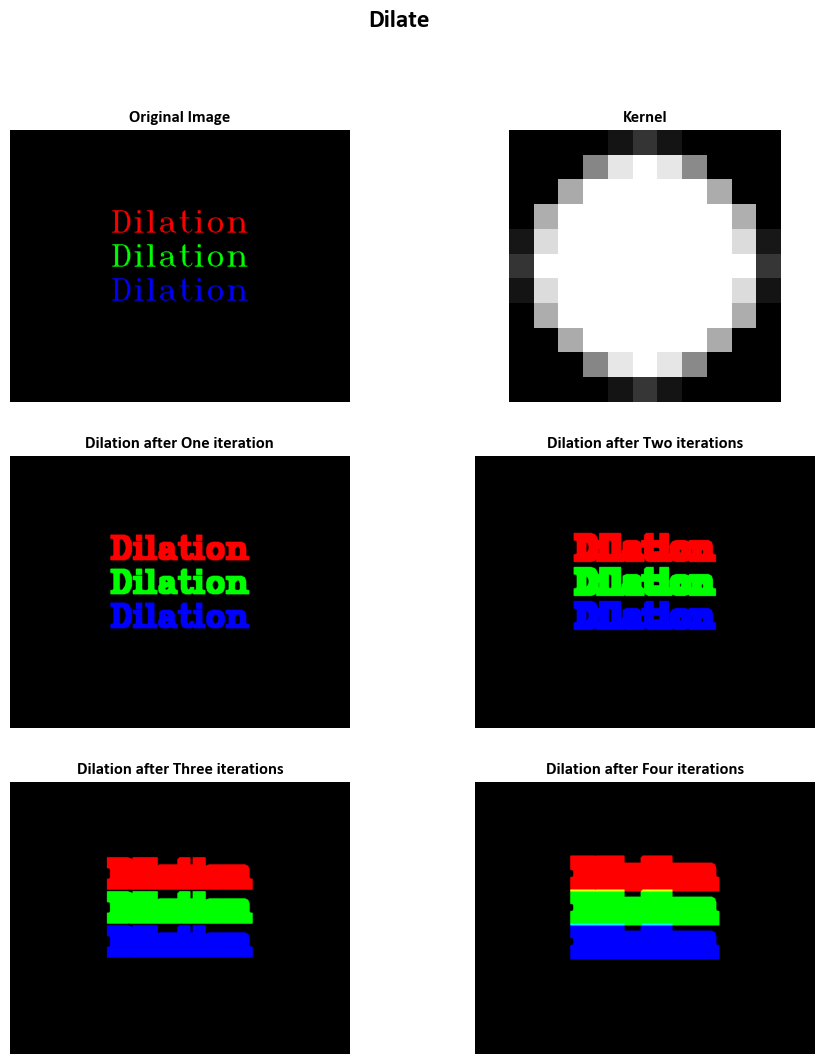

In [1]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import inflect

# Set global font properties for Matplotlib plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define color dictionary
Colors = {'White': (255, 255, 255), 'Black': (0, 0, 0), 'Red': (255, 0, 0), 'Green': (0, 255, 0), 'Blue': (0, 0, 255)}

# Create a blank sample image
Img = np.zeros((800, 1000, 3), np.uint8)

# Text to overlay on the image
TXT = 'Dilation'

# Define font parameters
FF = cv2.FONT_HERSHEY_TRIPLEX  # FontFace
thickness = 2  # Font thickness
FS = 3  # Font Scale

# Measure text size for positioning
(label_width, label_height), _ = cv2.getTextSize(text=TXT, fontFace=FF, fontScale=FS, thickness=thickness)

# Overlay text in different colors and positions on the image
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) - 100),
                  fontFace=FF, fontScale=FS, color=Colors['Red'], thickness=thickness)

Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2)),
                  fontFace=FF, fontScale=3, color=Colors['Green'], thickness=thickness)

Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) + 100),
                  fontFace=FF, fontScale=3, color=Colors['Blue'], thickness=thickness)

# Clean up variables
del FF, thickness, FS, label_width, label_height

# Create a kernel for dilation
kernel = np.ones((11, 11), np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0] / 2), int(kernel.shape[1] / 2)),
               int(min(kernel.shape) / 2 - min(kernel.shape) / 10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

# Set up subplots for visualization
rows = 3
fig, ax = plt.subplots(rows * 1, 2, figsize=(11, rows * 4))
ax = ax.ravel()

# Set main title for the entire figure
_ = fig.suptitle('Dilate', weight='bold', fontsize=18)

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold', fontsize=12)

# Display the kernel in grayscale in the second subplot
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', weight='bold', fontsize=12)

# Perform image dilation and visualize the results
IT = 4  # Number of dilation iterations
for i in range(1, IT+1):
    Out = cv2.dilate(Img, kernel, iterations=i)
    _ = ax[i+1].imshow(Out)
    # Set titles for each dilation iteration
    if i == 1:
        _ = ax[i+1].set_title('Dilation after %s iteration' % inflect.engine().number_to_words(i).title(),
                              weight='bold', fontsize=12)
    else:
        _ = ax[i+1].set_title('Dilation after %s iterations' % inflect.engine().number_to_words(i).title(),
                              weight='bold', fontsize=12)

# Set aspect ratio and turn off axis labels for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code demonstrates the concept of image dilation using OpenCV and Matplotlib for visualization. Here's a brief overview of what the code does:

1. **Importing Libraries**: The code imports necessary libraries, including NumPy, OpenCV (cv2), Matplotlib (plt), a font manager for text rendering, and an inflection library (inflect) for converting numbers to words.

2. **Setting Plot Font Properties**: Adjusts global font properties for Matplotlib plots, setting the font family to Calibri and the title size to 16.

3. **Sample Image**: Creates a blank sample image (800x1000 pixels) and defines color values in a dictionary named "Colors." The sample image is initialized as a black image.

4. **Text Overlay**: Adds the text "Dilation" to the sample image in three different colors (Red, Green, and Blue) with variations in positioning and sizes. This demonstrates text overlay using OpenCV.

5. **Kernel Creation**: Defines a kernel for dilation as a 2D array of ones with a specified size (11x11). A circular region is carved out in the center of the kernel, creating a circular structuring element.

6. **Plots**: Prepares a 3x2 grid of subplots using Matplotlib for visualizing the following:
   - The original image with overlaid text (in different colors).
   - The kernel used for dilation.

7. **Dilation Visualization**: Performs image dilation on the original image using the created kernel. The code iteratively shows the result of dilation after different numbers of iterations (1 to 4), each time updating the subplot.

8. **Plot Settings**: Adjusts plot aspects (aspect ratio) and turns off axis labels for better visualization.

Erosion is a fundamental morphological operation used in image processing. It involves the application of a small matrix called a kernel or structuring element to the input image. This kernel has an anchor point, typically at its center, and is convolved over the image.

During the erosion operation:
- The kernel's center is placed on each pixel in the input image.
- The values of the kernel are compared to the corresponding pixels in the neighborhood around the current pixel.
- The output pixel value is determined by finding the minimum value among the kernel elements that overlap with the neighborhood.

This process causes regions in the image to shrink or erode, as the minimum pixel value in the neighborhood becomes the new value for the central pixel. Erosion is useful for:
- Removing small details and noise from an image.
- Smoothing boundaries and separating or breaking apart connected regions.
- Preparing images for further processing or analysis.

The [erode](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.erode#erode) function in OpenCV performs erosion using a specified structuring element, which defines the shape of the pixel neighborhood for minimum value extraction. It operates according to the following equation:

\begin{equation}
\texttt{dst}(x, y) = \min_{(x', y'): \, \texttt{element}(x', y') \neq 0} \texttt{src}(x + x', y + y')
\end{equation}

Where:
- $\texttt{dst}(x, y)$ is the output pixel value.
- $\texttt{element}(x', y')$ represents the structuring element's value at position $(x', y')$.
- $\texttt{src}(x + x', y + y')$ denotes the corresponding pixel value in the neighborhood of the current pixel.

This function is an essential tool for various image processing tasks, including noise reduction, object segmentation, feature extraction, and image analysis. It complements other morphological operations like dilation, providing valuable control over the shape and size of objects within an image.

The Python function "cv2.erode()" is used for image erosion, a fundamental operation in computer vision and image processing. This function modifies an input image by removing the outer boundaries of objects within the image. The erosion process is achieved by convolving the input image with a specified kernel or structuring element.

Here's a refined explanation of the function and its parameters:

```
cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst
```

- `src`: The input image (source image) on which the erosion operation will be applied.
- `kernel`: The structuring element used for the erosion. This defines the shape and size of the neighborhood around each pixel. It specifies the pattern used for removing pixels based on their local arrangement.
- `dst` (optional): The output image where the result of the erosion operation will be stored. If not provided, the function creates a new image for the result.
- `anchor` (optional): The anchor point within the kernel. It indicates which pixel of the kernel corresponds to the central pixel of the neighborhood being processed.
- `iterations` (optional): The number of times the erosion operation is applied. If not specified, it defaults to 1.
- `borderType` (optional): Specifies how to handle pixels near the border of the image. Common values include cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, etc.
- `borderValue` (optional): The value assigned to the pixels in the border area if the "borderType" is set to cv2.BORDER_CONSTANT.

The function returns the resulting image after applying the erosion operation. The erosion operation reduces the size of the foreground objects and eliminates small details while preserving the overall structure of the objects in the image.

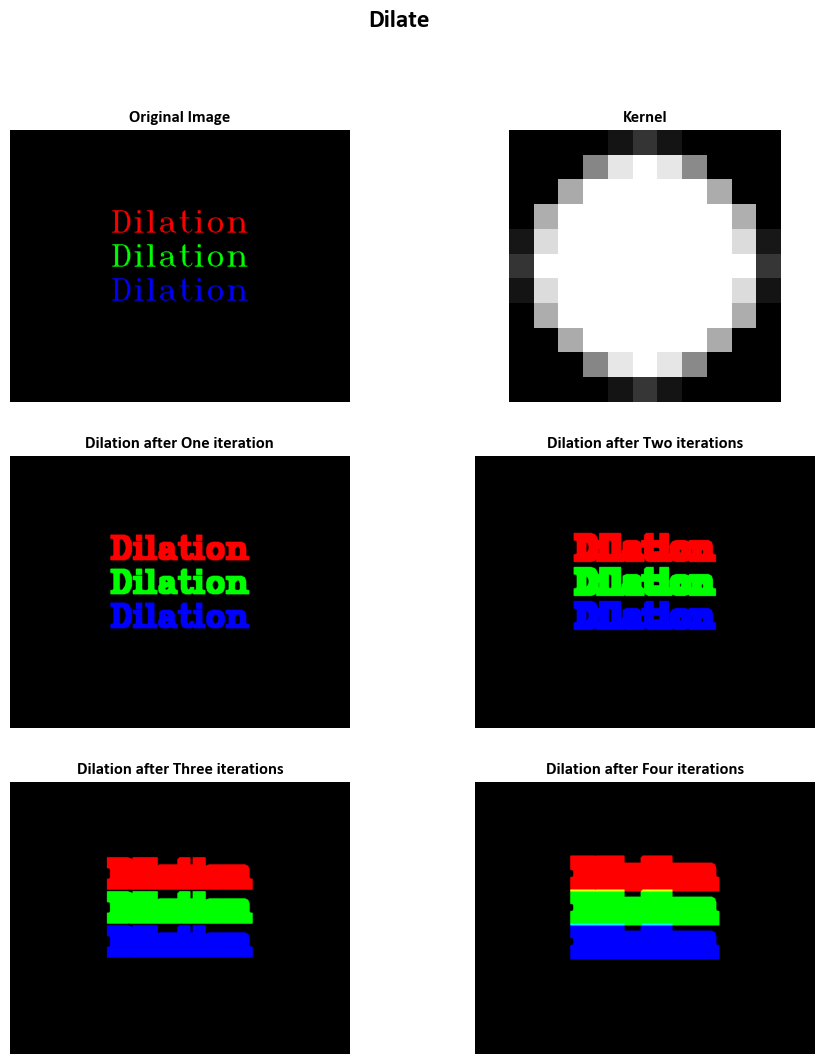

In [2]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import inflect

# Set global font properties for Matplotlib plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define color dictionary
Colors = {'White': (255, 255, 255), 'Black': (0, 0, 0), 'Red': (255, 0, 0), 'Green': (0, 255, 0), 'Blue': (0, 0, 255)}

# Create a blank sample image
Img = np.zeros((800, 1000, 3), np.uint8)

# Text to overlay on the image
TXT = 'Dilation'

# Define font parameters
FF = cv2.FONT_HERSHEY_TRIPLEX  # FontFace
thickness = 2  # Font thickness
FS = 3  # Font Scale

# Measure text size for positioning
(label_width, label_height), _ = cv2.getTextSize(text=TXT, fontFace=FF, fontScale=FS, thickness=thickness)

# Overlay text in different colors and positions on the image
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) - 100),
                  fontFace=FF, fontScale=FS, color=Colors['Red'], thickness=thickness)

Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2)),
                  fontFace=FF, fontScale=3, color=Colors['Green'], thickness=thickness)

Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) + 100),
                  fontFace=FF, fontScale=3, color=Colors['Blue'], thickness=thickness)

# Clean up variables
del FF, thickness, FS, label_width, label_height

# Create a kernel for dilation
kernel = np.ones((11, 11), np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0] / 2), int(kernel.shape[1] / 2)),
               int(min(kernel.shape) / 2 - min(kernel.shape) / 10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

# Set up subplots for visualization
rows = 3
fig, ax = plt.subplots(rows * 1, 2, figsize=(11, rows * 4))
ax = ax.ravel()

# Set main title for the entire figure
_ = fig.suptitle('Dilate', weight='bold', fontsize=18)

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold', fontsize=12)

# Display the kernel in grayscale in the second subplot
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', weight='bold', fontsize=12)

# Perform image dilation and visualize the results
IT = 4  # Number of dilation iterations
for i in range(1, IT+1):
    Out = cv2.dilate(Img, kernel, iterations=i)
    _ = ax[i+1].imshow(Out)
    # Set titles for each dilation iteration
    if i == 1:
        _ = ax[i+1].set_title('Dilation after %s iteration' % inflect.engine().number_to_words(i).title(),
                              weight='bold', fontsize=12)
    else:
        _ = ax[i+1].set_title('Dilation after %s iterations' % inflect.engine().number_to_words(i).title(),
                              weight='bold', fontsize=12)

# Set aspect ratio and turn off axis labels for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code is a concise explanation of how to use image processing operations, particularly dilation, with the help of Python libraries like OpenCV and Matplotlib. Here's a breakdown of what each section does:

1. **Import Libraries:** The code begins by importing the necessary libraries: `numpy` (for numerical operations), `cv2` (OpenCV for image processing), `matplotlib.pyplot` (for visualization), `FontProperties` from `matplotlib.font_manager` (for controlling font properties), and `inflect` (for converting numbers to words).

2. **Set Font Properties:** The code updates global font properties for Matplotlib plots, ensuring that the chosen font family and title size are consistent across the entire visualization.

3. **Define Color Dictionary:** A dictionary called `Colors` is defined, mapping color names to RGB values.

4. **Create Sample Image:** A blank image (`Img`) is created with dimensions 800x1000 and 3 channels (for RGB).

5. **Overlay Text on Image:** The text "Dilation" is overlaid on the image with different colors and positions using OpenCV's `putText` function. This creates a visual representation for the concept of dilation.

6. **Cleanup Variables:** Temporary variables used for text positioning are deleted to free up memory.

7. **Create Dilation Kernel:** A square kernel (11x11) with a circular white region in the center is created. This kernel will be used for the dilation operation. The circular region makes the dilation effect more visually intuitive.

8. **Set Up Subplots:** Matplotlib subplots are prepared to display the original image, the dilation kernel, and the results of the dilation operation. The layout consists of three rows and two columns.

9. **Set Main Title:** The entire figure is given a title "Dilate" using Matplotlib's `suptitle` function.

10. **Display Original Image:** The original image with the overlaid text is displayed in the first subplot.

11. **Display Kernel:** The dilation kernel is shown in grayscale in the second subplot.

12. **Perform Dilation and Visualize Results:** The code performs the dilation operation using OpenCV's `dilate` function. The results of dilation after each iteration (up to 4 iterations) are displayed in subsequent subplots. The titles for each subplot describe the number of iterations.

13. **Adjust Subplot Appearance:** The aspect ratio is set to 1 (to prevent distortion) and axis labels are turned off for all subplots.

## morphologyEx

The `morphologyEx` function in OpenCV is a flexible tool that enables the application of diverse morphological operations to an image. This function empowers us to execute operations such as erosion, dilation, opening, closing, and others, utilizing a wide range of structuring elements or kernels.

Morphological operations are fundamental image processing techniques that focus on the shape and structure of objects within an image. These operations are particularly useful for tasks like noise reduction, edge enhancement, and object segmentation.

With the `morphologyEx` function, you can choose from various types of morphological operations and specify the structuring element that defines the local neighborhood around each pixel, determining the effect of the operation. This flexibility makes the function a valuable asset in various computer vision applications, enabling image enhancement and feature extraction.

Refine "cv.MorphologyEx" in Python:

```
cv.MorphologyEx(src, dst, temp, element, operation, iterations=1) → None
```

The `cv.MorphologyEx` function in Python is part of the OpenCV library, which is widely used for computer vision and image processing tasks. This function is used to perform various morphological operations on an input image (`src`) and produce the result in the output image (`dst`). Morphological operations involve the manipulation of the shape and structure of objects within an image.

Parameters:
- `src`: The source image on which the morphological operation is to be applied.
- `dst`: The output image where the result of the morphological operation will be stored.
- `temp`: A temporary image used for intermediate calculations.
- `element`: The structuring element used for the morphological operation. It defines the neighborhood around each pixel that is considered for the operation. This element can be created using functions like `cv.getStructuringElement`.
- `operation`: The type of morphological operation to be performed. This can be one of the following:
  - `cv.MORPH_ERODE`: Erosion operation.
  - `cv.MORPH_DILATE`: Dilation operation.
  - `cv.MORPH_OPEN`: Opening operation (erosion followed by dilation).
  - `cv.MORPH_CLOSE`: Closing operation (dilation followed by erosion).
  - `cv.MORPH_GRADIENT`: Morphological gradient.
  - `cv.MORPH_TOPHAT`: Top-hat operation.
  - `cv.MORPH_BLACKHAT`: Black-hat operation.
- `iterations`: The number of times the morphological operation is applied. Default is 1.

The `cv.MorphologyEx` function is a powerful tool for enhancing or reducing certain features within an image, such as noise removal, edge detection, and object segmentation. It's commonly used in various computer vision applications including image preprocessing, object detection, and image segmentation.

### Opening Operation

The "opening" operation is derived from the sequential application of erosion followed by dilation on an image.

Mathematically, the "opening" operation ($ \text{dst} = \text{open}(\text{src}, \text{element}) $) can be expressed as:

\begin{equation}
\texttt{dst} = \mathrm{open} ( \texttt{src} , \texttt{element} )= \mathrm{dilate} ( \mathrm{erode} ( \texttt{src} , \texttt{element} ))
\end{equation} 

The opening operation is particularly valuable for the elimination of small objects within an image. This process involves the initial erosion of the image, which reduces the size of foreground objects, followed by a dilation that slightly enlarges the objects while still keeping the removed small components eliminated during the erosion step. Consequently, the "opening" operation can effectively remove noise and minor variations from an image while preserving the larger, more significant structures.

<font color='Blue'><b>Example</b></font>:

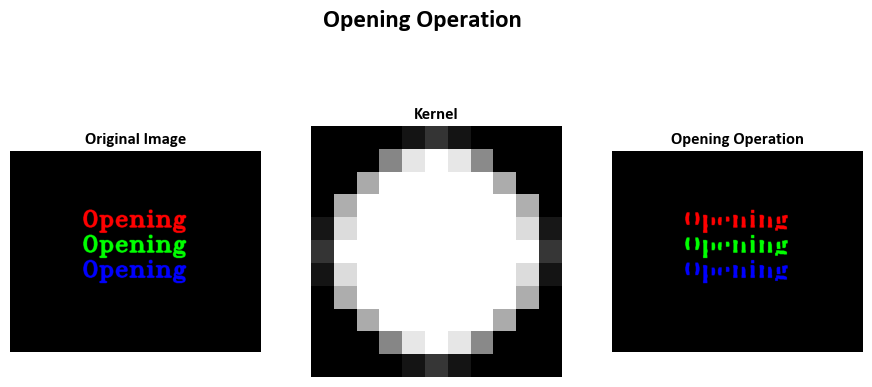

In [3]:
# Sample Image
# Create a blank image with dimensions 800x1000 and 3 channels (RGB)
Img = np.zeros((800, 1000, 3), np.uint8)

# Text to overlay on the image
TXT = 'Opening'

#### FontFace
# Choose the font face for the text
FF = cv2.FONT_HERSHEY_TRIPLEX

#### Font thickness
# Set the thickness of the font
thickness = 8

#### Font Scale
# Choose the scale of the font
FS = 3

# Measure the text size for positioning
# (label_width, label_height) stores the size of the text
(label_width, label_height), _ = cv2.getTextSize(text=TXT, fontFace=FF, fontScale=FS, thickness=thickness)

# Overlay the text in different colors and positions on the image
# Color: Red
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) - 100),
                   fontFace=FF, fontScale=FS, color=Colors['Red'], thickness=thickness)

# Color: Green
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2)),
                  fontFace=FF, fontScale=3, color=Colors['Green'], thickness=thickness)

# Color: Blue
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) + 100),
                  fontFace=FF, fontScale=3, color=Colors['Blue'], thickness=thickness)

# Clean up font-related variables to free up memory
del FF, thickness, FS, label_width, label_height

## Kernel
# Create a square kernel with a circular white region in the center
kernel = np.ones((11, 11), np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0] / 2), int(kernel.shape[1] / 2)),
               int(min(kernel.shape) / 2 - min(kernel.shape) / 10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots
# Set up subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
ax = ax.ravel()

# Set main title for the entire figure
_ = fig.suptitle('Opening Operation', weight='bold', fontsize=18)

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold', fontsize=12)

# Display the kernel in grayscale in the second subplot
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', weight='bold', fontsize=12)

## Opening Operation
# Perform the opening operation using the morphologyEx function with cv2.MORPH_OPEN
Out = cv2.morphologyEx(Img, cv2.MORPH_OPEN, kernel)

# Display the result of the opening operation in the third subplot
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Opening Operation', weight='bold', fontsize=12)

# Set aspect ratio and turn off axis labels for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code snippet performs the "opening" morphological operation on a blank sample image with some text, and it visualizes the process using matplotlib subplots. Here's a brief explanation:

1. **Sample Image:** A blank image with dimensions 800x1000 and 3 channels (RGB) is created.

2. **Text Overlay:** The text "Opening" is overlaid on the image in different colors (Red, Green, Blue) and positions.

3. **Kernel:** A kernel (structured element) is created. It's a square matrix with dimensions 11x11, and it has a circular white region in the center.

4. **Plots:** Subplots are set up for visualization, with the original image displayed in the first subplot and the kernel shown in grayscale in the second subplot. The main title for the figure is set as "Opening Operation."

5. **Opening Operation:** The "opening" morphological operation is performed using `cv2.morphologyEx` with `cv2.MORPH_OPEN`. The result is displayed in the third subplot.

6. **Aspect Ratio and Axis Labels:** Aspect ratio is set to 1, and axis labels are turned off for all subplots.

### Closing Operation

It is obtained by the dilation of an image followed by an erosion.

$$\texttt{dst} = \mathrm{close} ( \texttt{src} , \texttt{element} )= \mathrm{erode} ( \mathrm{dilate} ( \texttt{src} , \texttt{element} ))$$

<font color='Blue'><b>Example</b></font>:

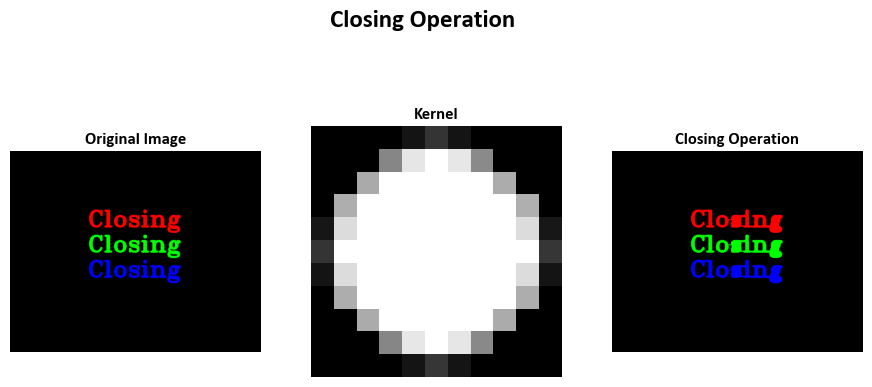

In [4]:
# Sample Image
# Create a blank image with dimensions 800x1000 and 3 channels (RGB)
Img = np.zeros((800, 1000, 3), np.uint8)

# Text to overlay on the image
TXT = 'Closing'

#### FontFace
# Choose the font face for the text
FF = cv2.FONT_HERSHEY_TRIPLEX

#### Font thickness
# Set the thickness of the font
thickness = 8

#### Font Scale
# Choose the scale of the font
FS = 3

# Measure the text size for positioning
# (label_width, label_height) stores the size of the text
(label_width, label_height), _ = cv2.getTextSize(text=TXT, fontFace=FF, fontScale=FS, thickness=thickness)

# Overlay the text in different colors and positions on the image
# Color: Red
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) - 100),
                   fontFace=FF, fontScale=FS, color=Colors['Red'], thickness=thickness)

# Color: Green
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2)),
                  fontFace=FF, fontScale=3, color=Colors['Green'], thickness=thickness)

# Color: Blue
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) + 100),
                  fontFace=FF, fontScale=3, color=Colors['Blue'], thickness=thickness)

# Clean up font-related variables to free up memory
del FF, thickness, FS, label_width, label_height

## Kernel
# Create a square kernel with a circular white region in the center
kernel = np.ones((11, 11), np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0] / 2), int(kernel.shape[1] / 2)),
               int(min(kernel.shape) / 2 - min(kernel.shape) / 10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

## Plots
# Set up subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
ax = ax.ravel()

# Set main title for the entire figure
_ = fig.suptitle('Closing Operation', weight='bold', fontsize=18)

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold', fontsize=12)

# Display the kernel in grayscale in the second subplot
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', weight='bold', fontsize=12)

## Closing Operation
# Perform the closing operation using the morphologyEx function with cv2.MORPH_CLOSE
Out = cv2.morphologyEx(Img, cv2.MORPH_CLOSE, kernel)

# Display the result of the closing operation in the third subplot
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Closing Operation', weight='bold', fontsize=12)

# Set aspect ratio and turn off axis labels for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code is a Python script that uses the OpenCV library to demonstrate the "closing" operation in morphological image processing. The code also uses NumPy for array manipulation and Matplotlib for visualization. Here's a brief explanation of each part of the code:

1. **Image Initialization:** A blank image (black) is created with dimensions 800x1000 pixels and 3 channels (RGB).

2. **Text Overlay:** The script specifies a text string ("Closing") to be overlaid on the image. The font face, thickness, and scale for the text are defined.

3. **Text Measurement:** The size of the text is measured to determine its dimensions for proper positioning.

4. **Text Overlay in Different Colors:** The script overlays the same text at three different positions on the image, each with a different color (Red, Green, and Blue). The positions are above, at, and below the center of the image.

5. **Kernel Creation:** A square kernel is created with a circular white region in the center. The size of the kernel is 11x11 pixels.

6. **Visualization:** The code sets up a visual display with three subplots using Matplotlib. The first subplot shows the original image with the overlaid text. The second subplot shows the created kernel in grayscale. The third subplot shows the result of the closing operation using the created kernel.

7. **Closing Operation:** The closing operation is performed on the original image using the `cv2.morphologyEx` function with the `cv2.MORPH_CLOSE` operation and the created kernel.

8. **Display Result:** The result of the closing operation is displayed in the third subplot.

9. **Aspect Ratio and Axis Labels:** Aspect ratio is set to 1 for all subplots, and axis labels are turned off for better visualization.

### Morphological Gradient

The "Morphological Gradient" is a valuable concept in image processing, obtained by calculating the difference between the dilation and the erosion of an image using a specified structuring element.

Mathematically, the "Morphological Gradient" operation ($ \text{dst} = \text{morph_grad}(\text{src}, \text{element}) $) can be defined as:

\begin{equation}
\text{dst} = \text{dilate}(\text{src}, \text{element}) - \text{erode}(\text{src}, \text{element})
\end{equation}

This operation provides insight into the edges and boundaries within an image. By taking the difference between the dilated and eroded versions of the image, the "Morphological Gradient" highlights regions of significant intensity variation, essentially emphasizing the edges of objects in the image.

The morphological gradient can be especially useful in tasks such as edge detection, image enhancement, and feature extraction. It enhances the visibility of edges while minimizing the impact of noise and small details in the image. The structuring element (\( \text{element} \)) plays a crucial role in determining the size and shape of the neighborhood around each pixel, influencing the sensitivity of the gradient operation to the image's details.

<font color='Blue'><b>Example</b></font>:

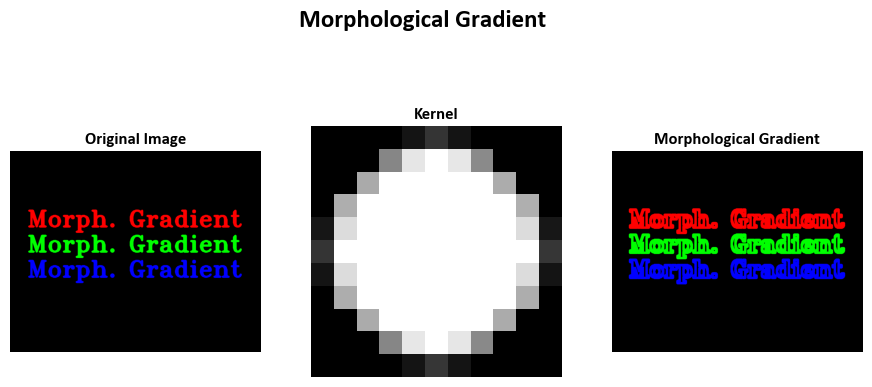

In [5]:
# Sample Image
# Create a blank image with dimensions 800x1000 and 3 channels (RGB)
Img = np.zeros((800, 1000, 3), np.uint8)

# Text to overlay on the image
TXT = 'Morph. Gradient'

# FontFace
# Choose the font face for the text
FF = cv2.FONT_HERSHEY_TRIPLEX

# Font thickness
# Set the thickness of the font
thickness = 8

# Font Scale
# Choose the scale of the font
FS = 3

# Measure the text size for positioning
# (label_width, label_height) stores the size of the text
(label_width, label_height), _ = cv2.getTextSize(text=TXT, fontFace=FF, fontScale=FS, thickness=thickness)

# Overlay the text in different colors and positions on the image
# Color: Red
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) - 100),
                   fontFace=FF, fontScale=FS, color=Colors['Red'], thickness=thickness)

# Color: Green
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2)),
                  fontFace=FF, fontScale=3, color=Colors['Green'], thickness=thickness)

# Color: Blue
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) + 100),
                  fontFace=FF, fontScale=3, color=Colors['Blue'], thickness=thickness)

# Clean up font-related variables to free up memory
del FF, thickness, FS, label_width, label_height

# Kernel
# Create a square kernel with a circular white region in the center
kernel = np.ones((11, 11), np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0] / 2), int(kernel.shape[1] / 2)),
               int(min(kernel.shape) / 2 - min(kernel.shape) / 10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

# Plots
# Set up subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
ax = ax.ravel()

# Set main title for the entire figure
_ = fig.suptitle('Morphological Gradient', weight='bold', fontsize=18)

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold', fontsize=12)

# Display the kernel in grayscale in the second subplot
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', weight='bold', fontsize=12)

# Morphological Gradient
# Perform the morphological gradient operation using morphologyEx function with cv2.MORPH_GRADIENT
Out = cv2.morphologyEx(Img, cv2.MORPH_GRADIENT, kernel)

# Display the result of the morphological gradient operation in the third subplot
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Morphological Gradient', weight='bold', fontsize=12)

# Set aspect ratio and turn off axis labels for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')


This code demonstrates the concept of the "Morphological Gradient" using Python with the OpenCV and Matplotlib libraries. Let's break down what each section does:

1. **Image Initialization:** A blank image with dimensions 800x1000 and 3 channels (RGB) is created. This image will serve as the canvas for the demonstration.

2. **Text Overlay:** The script specifies a text string ("Morph. Gradient") to be overlaid on the image. The font face, thickness, and scale for the text are defined.

3. **Text Measurement:** The size of the text is measured to determine its dimensions for proper positioning.

4. **Text Overlay in Different Colors:** The script overlays the same text at three different vertical positions on the image, each with a different color (Red, Green, and Blue). This creates a gradient effect.

5. **Clean Up:** Font-related variables are deleted to free up memory.

6. **Kernel Creation:** A square kernel is created with a circular white region in the center. The size of the kernel is 11x11 pixels.

7. **Visualization:** The code sets up a visual display with three subplots using Matplotlib. The first subplot shows the original image with the overlaid text. The second subplot shows the created kernel in grayscale. The third subplot will show the result of the morphological gradient operation.

8. **Morphological Gradient:** The morphological gradient operation is performed on the original image using the `cv2.morphologyEx` function with the `cv2.MORPH_GRADIENT` operation and the created kernel. This operation highlights the edges and boundaries of objects in the image.

9. **Display Result:** The result of the morphological gradient operation is displayed in the third subplot.

10. **Aspect Ratio and Axis Labels:** Aspect ratio is set to 1 for all subplots, and axis labels are turned off for better visualization.

### Top Hat

It is the difference between an input image and its opening.

$$\texttt{dst} = \mathrm{tophat} ( \texttt{src} , \texttt{element} )= \texttt{src} - \mathrm{open} ( \texttt{src} , \texttt{element} )$$

<font color='Blue'><b>Example</b></font>:

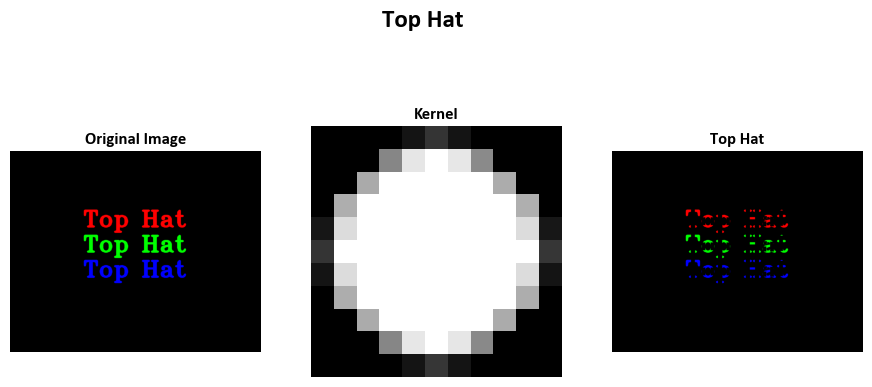

In [6]:
# Sample Image
# Create a blank image with dimensions 800x1000 and 3 channels (RGB)
Img = np.zeros((800, 1000, 3), np.uint8)

# Text to overlay on the image
TXT = 'Top Hat'

# FontFace
# Choose the font face for the text
FF = cv2.FONT_HERSHEY_TRIPLEX

# Font thickness
# Set the thickness of the font
thickness = 8

# Font Scale
# Choose the scale of the font
FS = 3

# Measure the text size for positioning
# (label_width, label_height) stores the size of the text
(label_width, label_height), _ = cv2.getTextSize(text=TXT, fontFace=FF, fontScale=FS, thickness=thickness)

# Overlay the text in different colors and positions on the image
# Color: Red
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) - 100),
                   fontFace=FF, fontScale=FS, color=Colors['Red'], thickness=thickness)

# Color: Green
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2)),
                  fontFace=FF, fontScale=3, color=Colors['Green'], thickness=thickness)

# Color: Blue
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) + 100),
                  fontFace=FF, fontScale=3, color=Colors['Blue'], thickness=thickness)

# Clean up font-related variables to free up memory
del FF, thickness, FS, label_width, label_height

# Kernel
# Create a square kernel with a circular white region in the center
kernel = np.ones((11, 11), np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0] / 2), int(kernel.shape[1] / 2)),
               int(min(kernel.shape) / 2 - min(kernel.shape) / 10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

# Plots
# Set up subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
ax = ax.ravel()

# Set main title for the entire figure
_ = fig.suptitle('Top Hat', weight='bold', fontsize=18)

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold', fontsize=12)

# Display the kernel in grayscale in the second subplot
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', weight='bold', fontsize=12)

# Top Hat
# Perform the top hat operation using morphologyEx function with cv2.MORPH_TOPHAT
Out = cv2.morphologyEx(Img, cv2.MORPH_TOPHAT, kernel)

# Display the result of the top hat operation in the third subplot
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Top Hat', weight='bold', fontsize=12)

# Set aspect ratio and turn off axis labels for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code demonstrates the concept of the "Top Hat" morphological operation using Python with the OpenCV and Matplotlib libraries. Here's a brief explanation of each part:

1. **Image Initialization:** A blank image with dimensions 800x1000 and 3 channels (RGB) is created. This image will serve as the canvas for the demonstration.

2. **Text Overlay:** The script specifies a text string ("Top Hat") to be overlaid on the image. The font face, thickness, and scale for the text are defined.

3. **Text Measurement:** The size of the text is measured to determine its dimensions for proper positioning.

4. **Text Overlay in Different Colors:** The script overlays the same text at three different vertical positions on the image, each with a different color (Red, Green, and Blue). This creates a gradient effect.

5. **Clean Up:** Font-related variables are deleted to free up memory.

6. **Kernel Creation:** A square kernel is created with a circular white region in the center. The size of the kernel is 11x11 pixels.

7. **Visualization:** The code sets up a visual display with three subplots using Matplotlib. The first subplot shows the original image with the overlaid text. The second subplot shows the created kernel in grayscale. The third subplot will show the result of the top hat operation.

8. **Top Hat Operation:** The top hat operation is performed on the original image using the `cv2.morphologyEx` function with the `cv2.MORPH_TOPHAT` operation and the created kernel. This operation highlights the bright structures (objects) in the image that are smaller than the kernel size.

9. **Display Result:** The result of the top hat operation is displayed in the third subplot.

10. **Aspect Ratio and Axis Labels:** Aspect ratio is set to 1 for all subplots, and axis labels are turned off for better visualization.

### Black Hat

The "Black Hat" operation is a significant concept in morphological image processing, achieved by computing the difference between the closing of the input image and the original input image itself, using a specified structuring element.

Mathematically, the "Black Hat" operation ($ \text{dst} = \text{blackhat}(\text{src}, \text{element}) $) can be expressed as:

\begin{equation}
\text{dst} = \text{close}(\text{src}, \text{element}) - \text{src}
\end{equation}

The "Black Hat" operation is particularly useful for highlighting and extracting small, dark regions or features within an image. By performing a closing operation on the input image, which consists of dilation followed by erosion, the "Black Hat" operation effectively removes the larger structures, leaving behind the smaller, darker structures that were present in the original image but were affected by the closing process.

This operation is commonly used for detecting small objects or details in an image, such as text in documents or small lesions in medical images. The structuring element ($ \text{element} $) determines the size and shape of the neighborhood around each pixel, influencing the sensitivity of the "Black Hat" operation to the image's details.

<font color='Blue'><b>Example</b></font>:

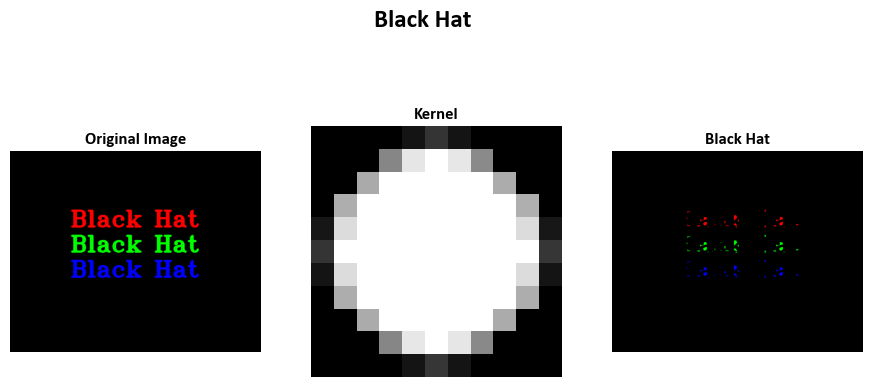

In [7]:
# Sample Image
# Create a blank image with dimensions 800x1000 and 3 channels (RGB)
Img = np.zeros((800, 1000, 3), np.uint8)

# Text to overlay on the image
TXT = 'Black Hat'

# FontFace
# Choose the font face for the text
FF = cv2.FONT_HERSHEY_TRIPLEX

# Font thickness
# Set the thickness of the font
thickness = 8

# Font Scale
# Choose the scale of the font
FS = 3

# Measure the text size for positioning
# (label_width, label_height) stores the size of the text
(label_width, label_height), _ = cv2.getTextSize(text=TXT, fontFace=FF, fontScale=FS, thickness=thickness)

# Overlay the text in different colors and positions on the image
# Color: Red
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) - 100),
                   fontFace=FF, fontScale=FS, color=Colors['Red'], thickness=thickness)

# Color: Green
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2)),
                  fontFace=FF, fontScale=3, color=Colors['Green'], thickness=thickness)

# Color: Blue
Img = cv2.putText(Img, text=TXT, org=(int((Img.shape[1] - label_width) / 2), int(Img.shape[0] / 2) + 100),
                  fontFace=FF, fontScale=3, color=Colors['Blue'], thickness=thickness)

# Clean up font-related variables to free up memory
del FF, thickness, FS, label_width, label_height

# Kernel
# Create a square kernel with a circular white region in the center
kernel = np.ones((11, 11), np.uint8)
_ = cv2.circle(kernel, (int(kernel.shape[0] / 2), int(kernel.shape[1] / 2)),
               int(min(kernel.shape) / 2 - min(kernel.shape) / 10), Colors['White'], thickness=-1, lineType=cv2.LINE_AA)

# Plots
# Set up subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
ax = ax.ravel()

# Set main title for the entire figure
_ = fig.suptitle('Black Hat', weight='bold', fontsize=18)

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold', fontsize=12)

# Display the kernel in grayscale in the second subplot
_ = ax[1].imshow(kernel, 'gray')
_ = ax[1].set_title('Kernel', weight='bold', fontsize=12)

# Black Hat
# Perform the black hat operation using morphologyEx function with cv2.MORPH_BLACKHAT
Out = cv2.morphologyEx(Img, cv2.MORPH_BLACKHAT, kernel)

# Display the result of the black hat operation in the third subplot
_ = ax[2].imshow(Out)
_ = ax[2].set_title('Black Hat', weight='bold', fontsize=12)

# Set aspect ratio and turn off axis labels for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code demonstrates the "Black Hat" morphological operation using Python with the OpenCV and Matplotlib libraries. Here's a brief explanation of each part:

1. **Image Initialization:** A blank image with dimensions 800x1000 and 3 channels (RGB) is created. This image will serve as the canvas for the demonstration.

2. **Text Overlay:** The script specifies a text string ("Black Hat") to be overlaid on the image. The font face, thickness, and scale for the text are defined.

3. **Text Measurement:** The size of the text is measured to determine its dimensions for proper positioning.

4. **Text Overlay in Different Colors:** The script overlays the same text at three different vertical positions on the image, each with a different color (Red, Green, and Blue). This creates a gradient effect.

5. **Clean Up:** Font-related variables are deleted to free up memory.

6. **Kernel Creation:** A square kernel is created with a circular white region in the center. The size of the kernel is 11x11 pixels.

7. **Visualization:** The code sets up a visual display with three subplots using Matplotlib. The first subplot shows the original image with the overlaid text. The second subplot shows the created kernel in grayscale. The third subplot will show the result of the black hat operation.

8. **Black Hat Operation:** The black hat operation is performed on the original image using the `cv2.morphologyEx` function with the `cv2.MORPH_BLACKHAT` operation and the created kernel. This operation highlights the darker structures (objects) in the image that are smaller than the kernel size.

9. **Display Result:** The result of the black hat operation is displayed in the third subplot.

10. **Aspect Ratio and Axis Labels:** Aspect ratio is set to 1 for all subplots, and axis labels are turned off for better visualization.